
BENBACHIR MOHAMED AMIR

LABIOD DALIL

In [2]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import squarify

# 1.  Analyse et prétraitement des données

## 1.1. Données statiques

### 1.1.1. Manipulation de dataset :

#### Importer et visualiser le contenu du dataset

In [7]:
def load_data_par_row(path,columns,col_type,rm_end=False):
    
    with open(path,'r') as f:
        
        start =True
        for line in f:
            if start:
                
                df= [columns]

                start =False
            else:
                if rm_end:
                    row = line[:-1].split(",")
                else:
                    row = line.split(",")
                n_row = []
                for i,c in enumerate(row):
                    try:
                        c = col_type[i](c)
                    except: 
                        c = None
                    n_row.append(c)
                df.append(n_row)
    return df

In [226]:
df = load_data_par_row("Dataset1.csv",columns = ["N","P","K","pH","EC","OC","S","Zn","Fe","Cu","Mn","B","OM","Fertility"],
                       col_type = [int,float,int,float,float,float,float,float,float,float,float,float,float,int])

In [227]:
df[:2]

[['N',
  'P',
  'K',
  'pH',
  'EC',
  'OC',
  'S',
  'Zn',
  'Fe',
  'Cu',
  'Mn',
  'B',
  'OM',
  'Fertility'],
 [138, 8.6, 560, 7.46, 0.62, 0.7, 5.9, 0.24, 0.31, 0.77, 8.71, 0.11, 1.204, 0]]

#### Fournir une description globale du dataset

In [228]:
def print_info_base(df):
    print("columns",df[0])
    print("dataset size :",len(df)-1)

In [229]:
print_info_base(df)

columns ['N', 'P', 'K', 'pH', 'EC', 'OC', 'S', 'Zn', 'Fe', 'Cu', 'Mn', 'B', 'OM', 'Fertility']
dataset size : 885


### 1.1.2. Analyse des caractéristiques des attributs du dataset :

In [230]:
def mean(l):
    
    mean = sum(l)/len(l)
    return mean

In [231]:
def median(column):
    sc = sorted(column)
    if len(sc)%2 != 0:
        return sc[len(column)//2]  
    else:
        return (sc[len(column)//2] +sc[len(column)//2+1] )/2

In [232]:
def mode(column):
    counter = dict()
    max_count = 0
    for val in column:
        if counter.get(val):
            counter[val] += 1
        else:
            counter[val] = 1
        max_count = max(max_count, counter[val])

    modes = [val for val, count in counter.items() if count == max_count]
    return modes

In [233]:
def sd(column,m):
    return math.sqrt(sum([(val-m)**2 for val in column])/(len(column)-1))

In [234]:
def Q(column):
    ordlist = sorted(column)
    min_c = min(column)
    if len(ordlist)%4 != 0:
        Q1 =  ordlist[len(column)//4]  
    else:
        Q1 = (ordlist[len(column)//4] +ordlist[len(column)//4+1] )/2
    Q2= median(column)
    if len(ordlist)%4 != 0:
        Q3 =  ordlist[(3*len(column))//4]  
    else:
        Q3 = (ordlist[(3*len(column))//4] +ordlist[(3*len(column))//4+1] )/2
    max_c=max(column)

    return [min_c,Q1,Q2,Q3,max_c]

In [235]:
def stats(df):
    ls = []
    for col in range(len(df[0])):
        l = [row[col] for row in df[1:] if row[col]!=None]
        ls.append(l)
        miss_vals = len(df)-1-len(l)
        print(df[0][col] , " : mean =",round(mean(l),2),"median =",median(l),"mode =",mode(l),"standard deviation =",round(sd(l,mean(l)),2),"Q =",Q(l),"miss_vals =",miss_vals)
    size = len(df[0])-1
    fig, axes = plt.subplots(1, size, figsize=(20, 4))
    plt.subplots_adjust(wspace=0.7)
    for i in range(size):
        ax = axes[i]
        ax.boxplot(ls[i],labels=[df[0][i]]) 
    plt.show()

N  : mean = 247.0 median = 257 mode = [207] standard deviation = 77.36 Q = [6, 201, 257, 307, 383] miss_vals = 0
P  : mean = 14.56 median = 8.1 mode = [8.3] standard deviation = 21.93 Q = [2.9, 6.8, 8.1, 10.7, 125.0] miss_vals = 2
K  : mean = 501.34 median = 475 mode = [444] standard deviation = 129.1 Q = [11, 412, 475, 581, 1560] miss_vals = 0
pH  : mean = 7.51 median = 7.5 mode = [7.5] standard deviation = 0.46 Q = [0.9, 7.35, 7.5, 7.63, 11.15] miss_vals = 0
EC  : mean = 0.54 median = 0.55 mode = [0.62, 0.53] standard deviation = 0.14 Q = [0.1, 0.43, 0.55, 0.64, 0.95] miss_vals = 0
OC  : mean = 0.62 median = 0.59 mode = [0.88] standard deviation = 0.84 Q = [0.1, 0.38, 0.59, 0.78, 24.0] miss_vals = 1
S  : mean = 7.55 median = 6.64 mode = [5.13, 4.22] standard deviation = 4.42 Q = [0.64, 4.7, 6.64, 8.75, 31.0] miss_vals = 0
Zn  : mean = 0.47 median = 0.36 mode = [0.28] standard deviation = 1.89 Q = [0.07, 0.28, 0.36, 0.47, 42.0] miss_vals = 0
Fe  : mean = 4.13 median = 3.56 mode = [6.3

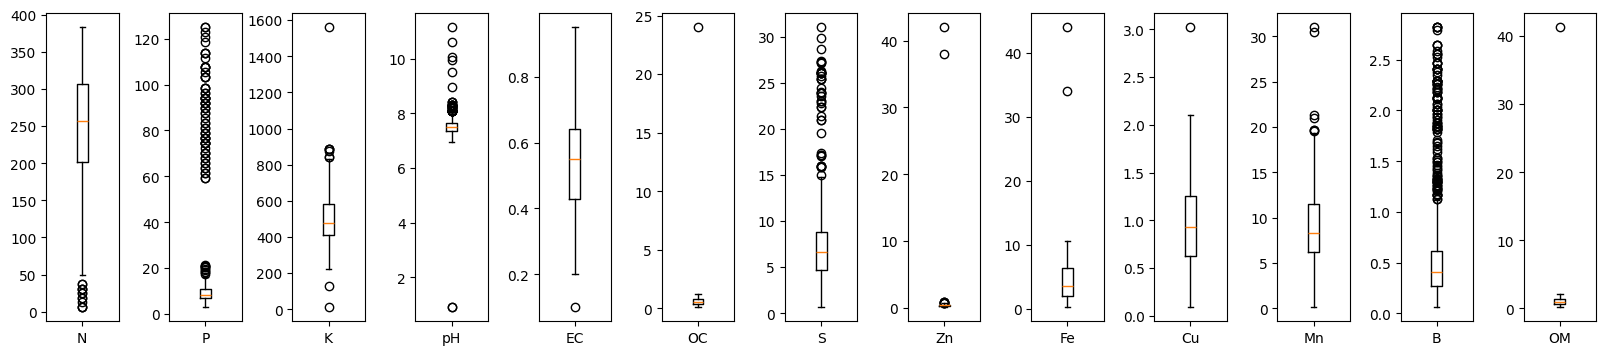

In [236]:
stats(df)

In [237]:
data = pd.read_csv("Dataset1.csv")

In [238]:
data.describe()

,N,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
count,885.000000,885.000000,885.000000,885.000000,884.000000,885.000000,885.000000,885.000000,884.000000,885.000000,885.000000,885.000000,885.000000
mean,246.997740,501.338983,7.511955,0.543921,0.617817,7.545808,0.468723,4.126757,0.952002,8.653616,0.593424,1.063718,0.592090
std,77.359316,129.104610,0.464577,0.141324,0.841123,4.418087,1.888892,3.108088,0.465527,4.300963,0.574736,1.446265,0.578405
min,6.000000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000,0.172000,0.000000
25%,201.000000,412.000000,7.350000,0.430000,0.380000,4.700000,0.280000,2.050000,0.630000,6.210000,0.270000,0.653600,0.000000
50%,257.000000,475.000000,7.500000,0.550000,0.590000,6.640000,0.360000,3.560000,0.930000,8.340000,0.410000,1.014800,1.000000
75%,307.000000,581.000000,7.630000,0.640000,0.780000,8.750000,0.470000,6.320000,1.250000,11.470000,0.610000,1.341600,1.000000
max,383.000000,1560.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000,41.280000,2.000000


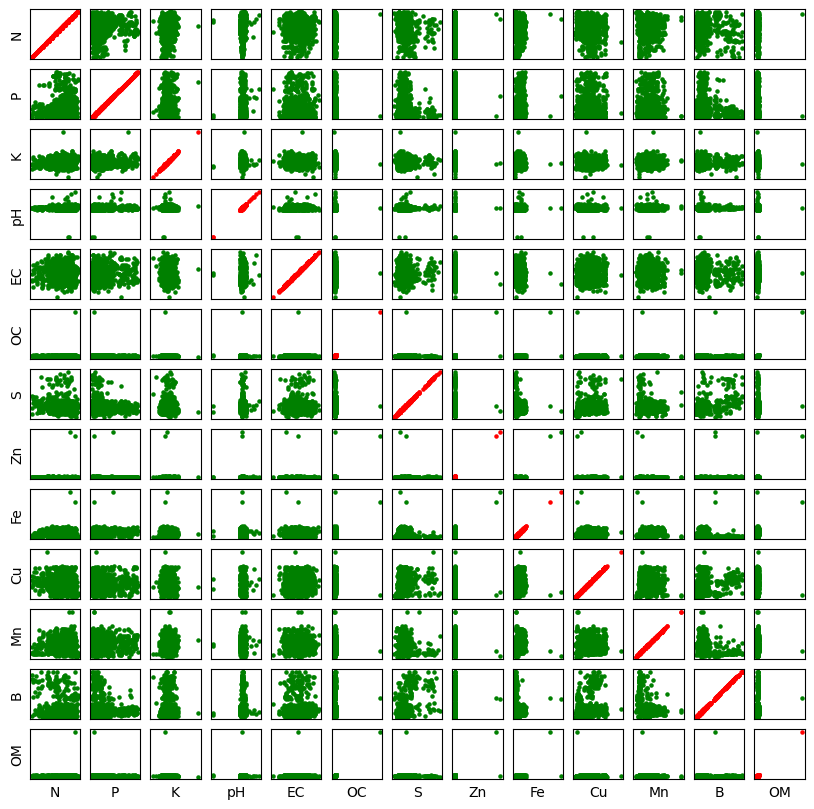

In [239]:
size = len(df[0])-1
fig, axes = plt.subplots(size, size, figsize=(10, 10))
for i in range(size):
    for j in range(size):
        ax = axes[j][i]
        if i==j:
            ax.scatter(data[df[0][i]],data[df[0][j]],s=5,c="red")
        else:
            ax.scatter(data[df[0][i]],data[df[0][j]],s=5,c="green")
        ax.set_xticks([])  # Remove x-axis tick labels
        ax.set_yticks([])
        if i==0:
            ax.set_ylabel(df[0][j])
        if j == size-1:
            ax.set_xlabel(df[0][i])
plt.savefig('correlation_figure.png', dpi=300)
plt.show()

In [240]:
def histogrames(df):
    ls = []
    for col in range(len(df[0])):
        l = [row[col] for row in df[1:] if row[col]!=None]
        ls.append(l)
        
    size = len(df[0])
    fig, axes = plt.subplots(2, 7, figsize=(20, 8))
    plt.subplots_adjust(wspace=0.1)
    for i in range(size):
        ax = axes[i%2][i//2]
        ax.hist(ls[i],bins=30,edgecolor='black')
        ax.set_title(df[0][i])
    plt.show()

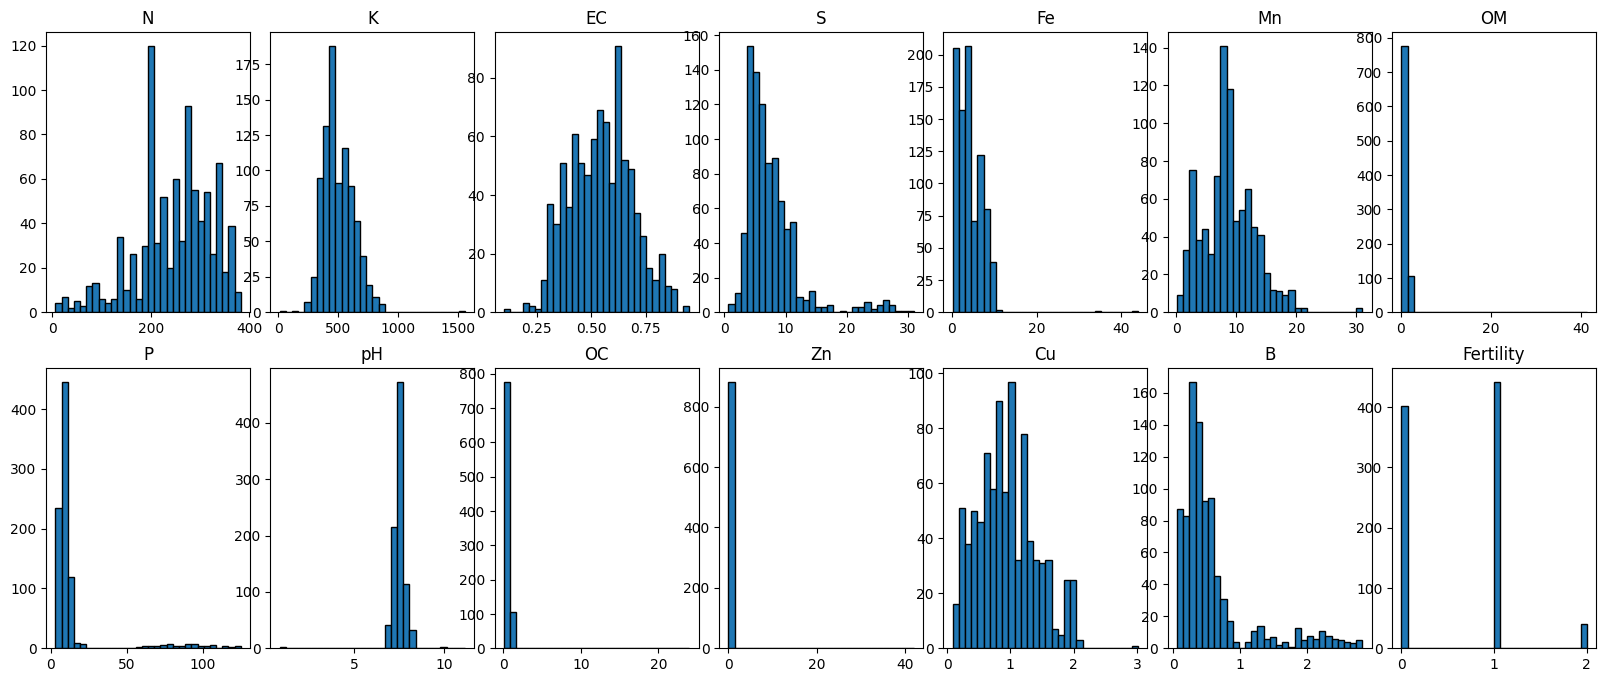

In [241]:
histogrames(df)

### 1.1.3. Prétraitement  

#### 1. Traitement des valeurs manquantes et aberrantes :

##### remplacement des valeurs manquantes

In [242]:
def fixWithMean(df,do_not = [] ):
    for col in range(len(df[0])):
        if col not in do_not:
            l = [row[col] for row in df[1:] if row[col]!=None]
            m = mean(l)
            for row in range(1,len(df)):
                if df[row][col]==None:
                    df[row][col]=m


In [243]:
fixWithMean(df)

N  : mean = 247.0 median = 257 mode = [207] standard deviation = 77.36 Q = [6, 201, 257, 307, 383] miss_vals = 0
P  : mean = 14.56 median = 8.1 mode = [8.3] standard deviation = 21.91 Q = [2.9, 6.8, 8.1, 10.7, 125.0] miss_vals = 0
K  : mean = 501.34 median = 475 mode = [444] standard deviation = 129.1 Q = [11, 412, 475, 581, 1560] miss_vals = 0
pH  : mean = 7.51 median = 7.5 mode = [7.5] standard deviation = 0.46 Q = [0.9, 7.35, 7.5, 7.63, 11.15] miss_vals = 0
EC  : mean = 0.54 median = 0.55 mode = [0.62, 0.53] standard deviation = 0.14 Q = [0.1, 0.43, 0.55, 0.64, 0.95] miss_vals = 0
OC  : mean = 0.62 median = 0.59 mode = [0.88] standard deviation = 0.84 Q = [0.1, 0.38, 0.59, 0.78, 24.0] miss_vals = 0
S  : mean = 7.55 median = 6.64 mode = [5.13, 4.22] standard deviation = 4.42 Q = [0.64, 4.7, 6.64, 8.75, 31.0] miss_vals = 0
Zn  : mean = 0.47 median = 0.36 mode = [0.28] standard deviation = 1.89 Q = [0.07, 0.28, 0.36, 0.47, 42.0] miss_vals = 0
Fe  : mean = 4.13 median = 3.56 mode = [6.3

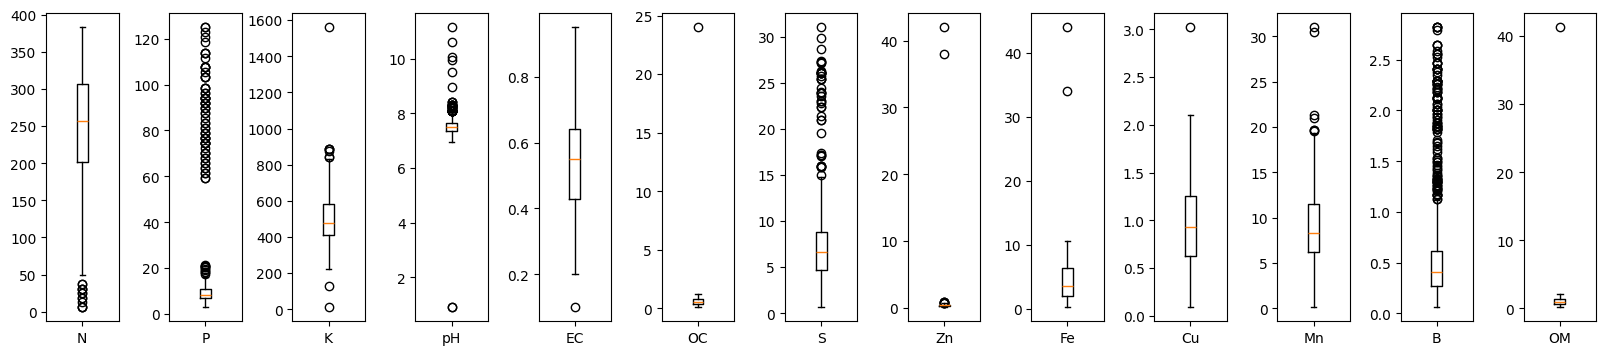

In [244]:
stats(df)

##### traitement des valeurs aberrantes

rejette et on applique ensuite une des méthodes d’imputation

In [245]:
def removeAberr(df,do_not = []):
    for col in range(len(df[0])):
        if col not in do_not:
            l = [row[col] for row in df[1:] if row[col]!=None]
            q = Q(l)
            iqr = q[3]-q[1]
            for row in range(1,len(df)):
                if (df[row][col]>(q[3]+1.5*iqr)) or (df[row][col]<(q[1]-1.5*iqr)):
                    df[row][col]=None

In [246]:
removeAberr(df)

In [247]:
fixWithMean(df)

N  : mean = 250.35 median = 257 mode = [207] standard deviation = 72.31 Q = [50, 201, 257, 307, 383] miss_vals = 0
P  : mean = 8.35 median = 8.1 mode = [8.353973431035064] standard deviation = 2.37 Q = [2.9, 6.8, 8.1, 9.0, 16.0] miss_vals = 0
K  : mean = 498.58 median = 475 mode = [444] standard deviation = 118.45 Q = [222, 412, 475, 581, 834] miss_vals = 0
pH  : mean = 7.48 median = 7.48287914691944 mode = [7.5] standard deviation = 0.23 Q = [6.96, 7.35, 7.48287914691944, 7.61, 8.05] miss_vals = 0
EC  : mean = 0.54 median = 0.55 mode = [0.62, 0.53] standard deviation = 0.14 Q = [0.2, 0.43, 0.55, 0.64, 0.95] miss_vals = 0
OC  : mean = 0.59 median = 0.59 mode = [0.88] standard deviation = 0.3 Q = [0.1, 0.38, 0.59, 0.78, 1.27] miss_vals = 0
S  : mean = 6.76 median = 6.64 mode = [5.13, 4.22] standard deviation = 2.56 Q = [0.64, 4.7, 6.64, 8.45, 14.8] miss_vals = 0
Zn  : mean = 0.38 median = 0.36 mode = [0.28] standard deviation = 0.12 Q = [0.07, 0.28, 0.36, 0.46, 0.75] miss_vals = 0
Fe  :

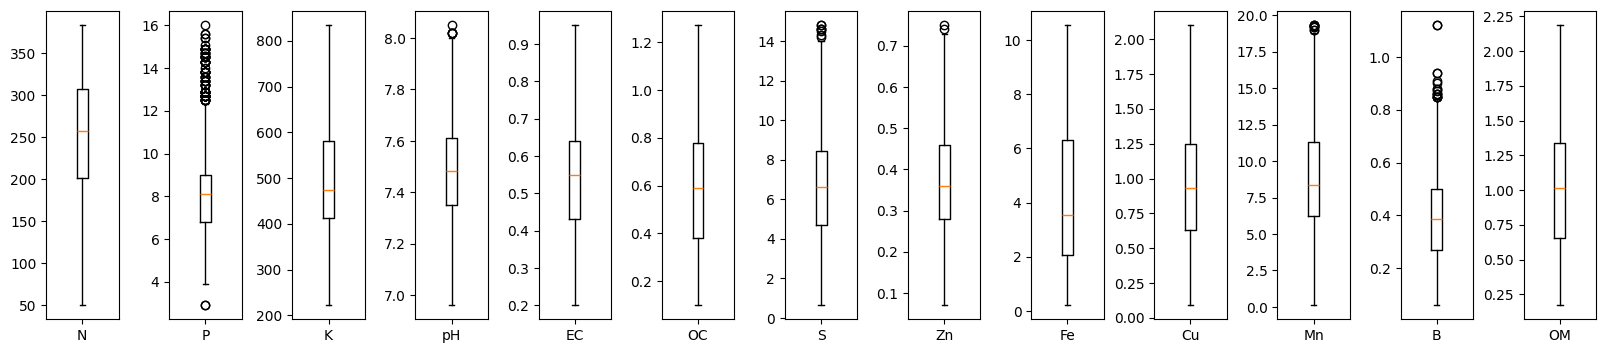

In [248]:
stats(df)

#### 2. Réduction des données (élimination des redondances) horizontales / verticales.

In [249]:
def remove_hozizontale(df):
    return [df[0]]+list(map(list, set(map(tuple, df[1:]))))


In [250]:
df = remove_hozizontale(df)

we can remove the OC or OM becaouse they are perfectly correlated

#### 3. Normalisation des données :

##### a. Méthode Min-Max. 

In [251]:
def normMinMax(l,min_new=0,max_new=1):
    min_old=min(l)
    max_old=max(l)
    for i in range(len(l)):
        l[i] = round((l[i]-min_old)/(max_old-min_old)*(max_new-min_new)+min_new,2)
    return l

##### b. Méthode z-score. 

In [252]:
def normZ_score(l,min_new=0,max_new=1):
    m=mean(l)
    s=sd(l,m)
    for i in range(len(l)):
        l[i] = (l[i]-m)/s
    return l

In [253]:
def normHist(df,MM=True,Z=True):
    ls = []
    for col in range(len(df[0])):
        l = [row[col] for row in df[1:] if row[col]!=None]
        if Z:
            l = normZ_score(l)
        if MM:
            l = normMinMax(l)
        
        ls.append(l)
        
    size = len(df[0])-1
    fig, axes = plt.subplots(2, 7, figsize=(20, 8))
    plt.subplots_adjust(wspace=0.1)
    for i in range(size):
        ax = axes[i%2][i//2]
        ax.hist(ls[i],bins=30,edgecolor='black')
        ax.set_title(df[0][i])
    plt.show()
    return  [df[0]] + list(map(list, zip(*ls)))

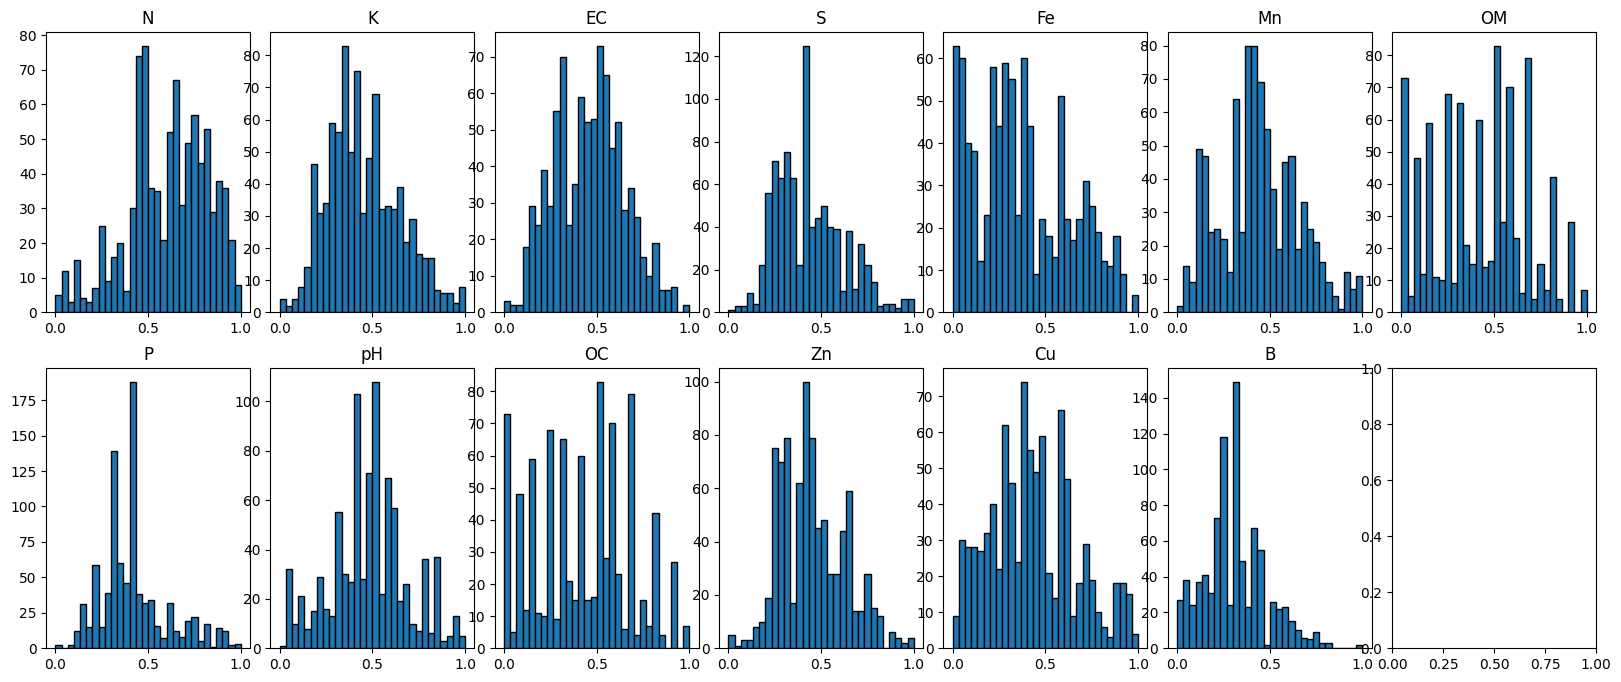

In [254]:
df_norm_mm = normHist(df,Z=False)

N  : mean = 0.6 median = 0.62 mode = [0.47] standard deviation = 0.22 Q = [0.0, 0.45, 0.62, 0.77, 1.0] miss_vals = 0
P  : mean = 0.42 median = 0.4 mode = [0.42] standard deviation = 0.18 Q = [0.0, 0.3, 0.4, 0.47, 1.0] miss_vals = 0
K  : mean = 0.45 median = 0.41 mode = [0.36] standard deviation = 0.19 Q = [0.0, 0.31, 0.41, 0.59, 1.0] miss_vals = 0
pH  : mean = 0.48 median = 0.48 mode = [0.5] standard deviation = 0.21 Q = [0.0, 0.36, 0.48, 0.6, 1.0] miss_vals = 0
EC  : mean = 0.46 median = 0.47 mode = [0.56, 0.44] standard deviation = 0.19 Q = [0.0, 0.31, 0.47, 0.59, 1.0] miss_vals = 0
OC  : mean = 0.42 median = 0.42 mode = [0.67] standard deviation = 0.25 Q = [0.0, 0.24, 0.42, 0.58, 1.0] miss_vals = 0
S  : mean = 0.43 median = 0.42 mode = [0.25] standard deviation = 0.18 Q = [0.0, 0.29, 0.42, 0.55, 1.0] miss_vals = 0
Zn  : mean = 0.45 median = 0.43 mode = [0.31] standard deviation = 0.17 Q = [0.0, 0.31, 0.43, 0.57, 1.0] miss_vals = 0
Fe  : mean = 0.37 median = 0.32 mode = [0.59] standa

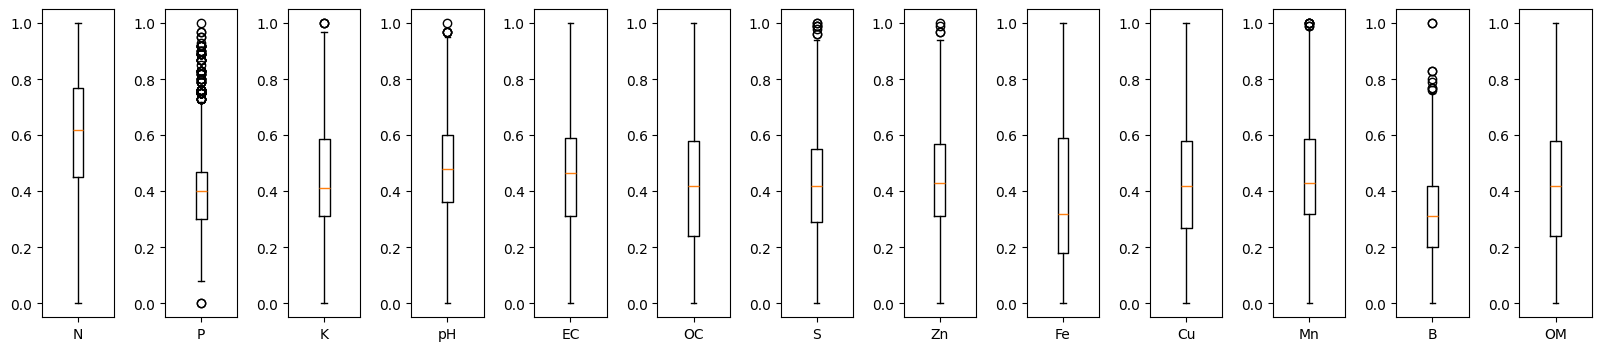

In [255]:
stats(df_norm_mm)

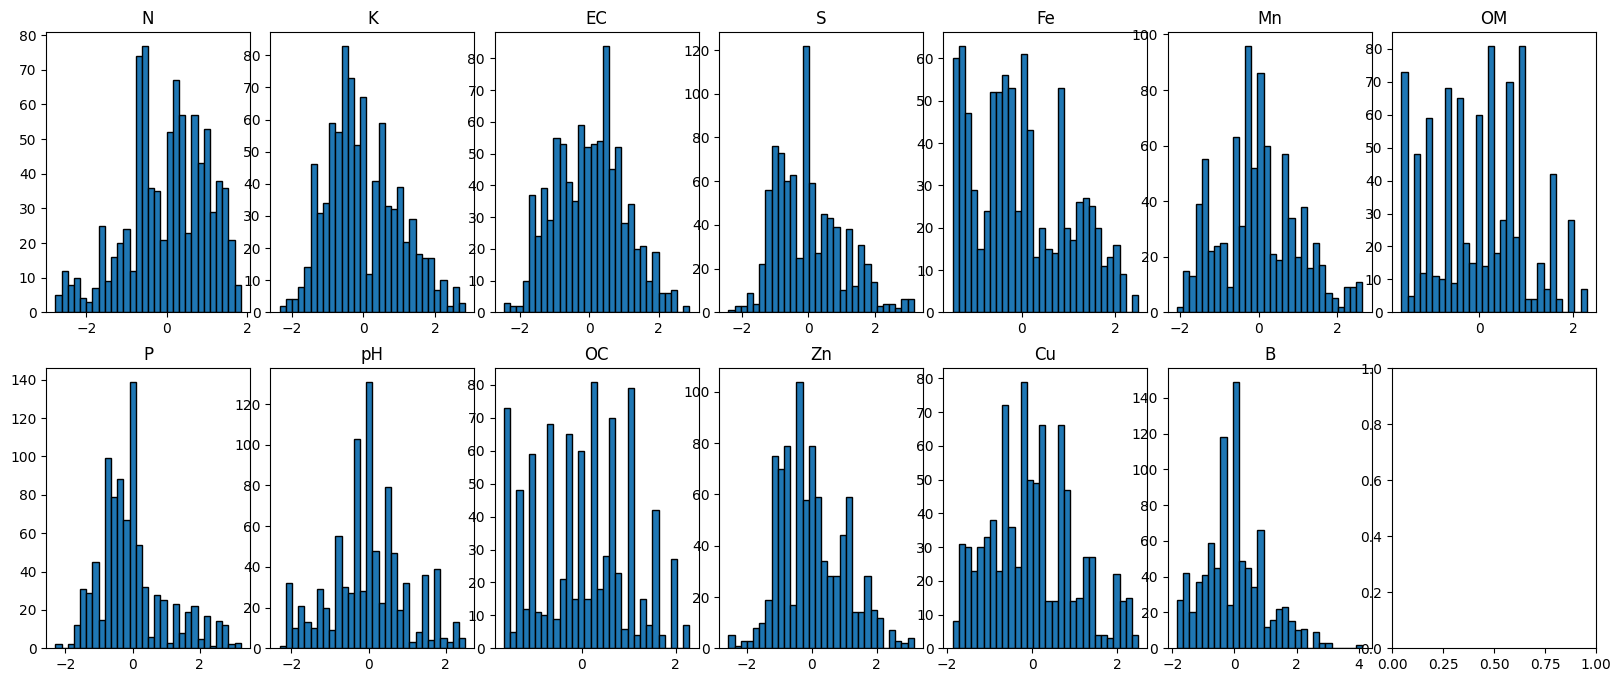

In [256]:
df_norm_z = normHist(df,MM=False)

N  : mean = -0.0 median = 0.09380941900023194 mode = [-0.5978277786172764] standard deviation = 1.0 Q = [-2.7695685791362528, -0.6808242423313775, 0.09380941900023194, 0.7854466166177403, 1.836735156996353] miss_vals = 0
P  : mean = -0.0 median = -0.10575375704409272 mode = [0.001357066328582761] standard deviation = 1.0 Q = [-2.2988031609442023, -0.6540161080191201, -0.10575375704409272, 0.2738124859386188, 3.2259943758041514] miss_vals = 0
K  : mean = 0.0 median = -0.1969435671383111 mode = [-0.4586574381170144] standard deviation = 1.0 Q = [-2.332866449641922, -0.7288136920305146, -0.1969435671383111, 0.6979490239501583, 2.833871906453769] miss_vals = 0
pH  : mean = -0.0 median = 0.0011551648027896394 mode = [0.07655056550286052] standard deviation = 1.0 Q = [-2.3014568963020787, -0.5840070627762908, 0.0011551648027896394, 0.5609594929075717, 2.498595202526413] miss_vals = 0
EC  : mean = -0.0 median = 0.04130600853932752 mode = [0.5388564317387544, -0.10085125523193754] standard dev

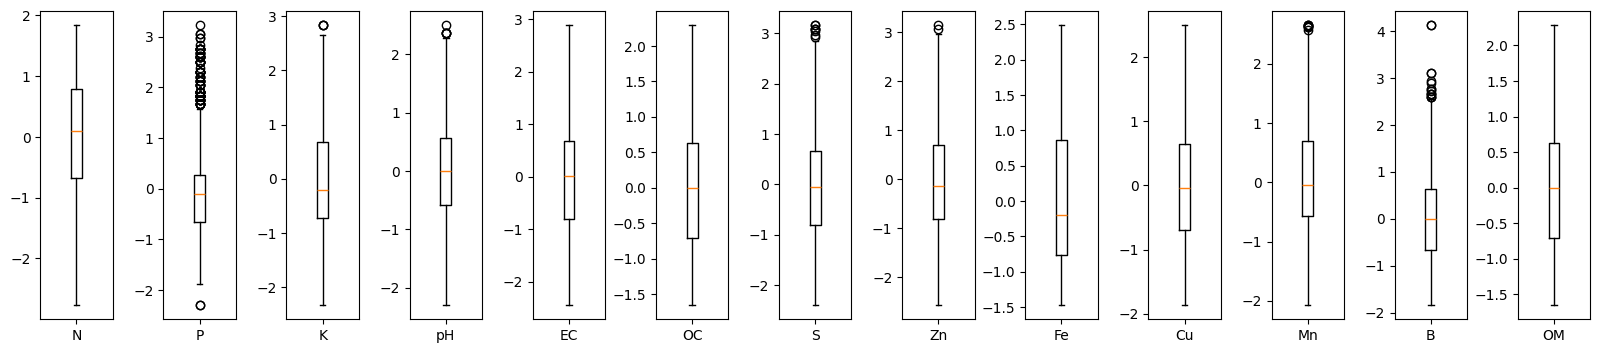

In [257]:
stats(df_norm_z)

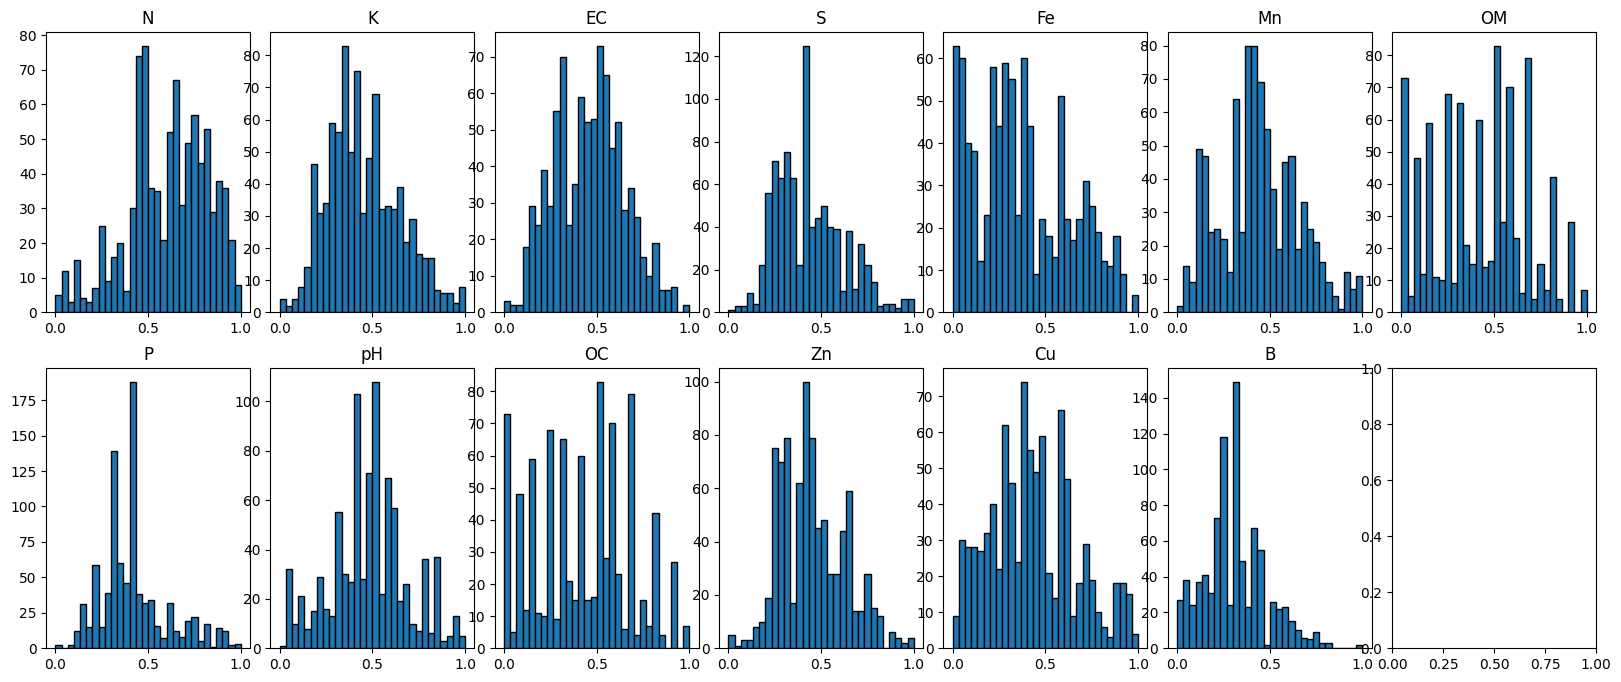

In [258]:
df_norm = normHist(df)

N  : mean = 0.6 median = 0.62 mode = [0.47] standard deviation = 0.22 Q = [0.0, 0.45, 0.62, 0.77, 1.0] miss_vals = 0
P  : mean = 0.42 median = 0.4 mode = [0.42] standard deviation = 0.18 Q = [0.0, 0.3, 0.4, 0.47, 1.0] miss_vals = 0
K  : mean = 0.45 median = 0.41 mode = [0.36] standard deviation = 0.19 Q = [0.0, 0.31, 0.41, 0.59, 1.0] miss_vals = 0
pH  : mean = 0.48 median = 0.48 mode = [0.5] standard deviation = 0.21 Q = [0.0, 0.36, 0.48, 0.6, 1.0] miss_vals = 0
EC  : mean = 0.46 median = 0.47 mode = [0.56, 0.44] standard deviation = 0.19 Q = [0.0, 0.31, 0.47, 0.59, 1.0] miss_vals = 0
OC  : mean = 0.42 median = 0.42 mode = [0.67] standard deviation = 0.25 Q = [0.0, 0.24, 0.42, 0.58, 1.0] miss_vals = 0
S  : mean = 0.43 median = 0.42 mode = [0.25] standard deviation = 0.18 Q = [0.0, 0.29, 0.42, 0.55, 1.0] miss_vals = 0
Zn  : mean = 0.45 median = 0.43 mode = [0.31] standard deviation = 0.17 Q = [0.0, 0.31, 0.43, 0.57, 1.0] miss_vals = 0
Fe  : mean = 0.37 median = 0.32 mode = [0.59] standa

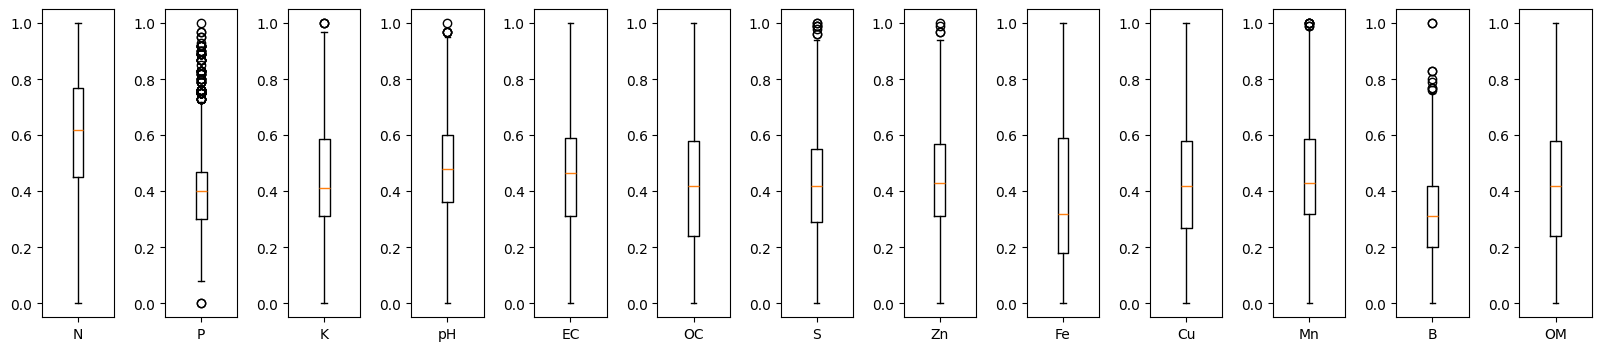

In [259]:
stats(df_norm)

In [260]:
data = pd.DataFrame(df_norm[1:])
data.columns = df[0]

In [261]:
data

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,0.59,0.65,0.53,0.63,0.39,0.83,0.25,0.76,0.37,0.89,0.49,0.34,0.83,0.0
1,0.96,0.50,0.83,0.31,0.52,0.00,0.32,0.65,0.76,0.22,0.58,0.22,0.00,0.5
2,0.70,0.41,0.40,0.40,0.75,0.44,0.13,0.46,0.05,0.67,0.14,0.83,0.44,0.5
3,0.79,0.30,0.31,0.21,0.16,0.83,0.66,0.79,0.74,0.47,0.30,0.26,0.83,0.5
4,0.66,0.38,0.64,0.50,0.33,0.42,0.34,0.31,0.39,0.42,0.38,0.26,0.42,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,0.81,0.50,0.38,0.83,0.55,0.00,0.76,0.47,0.57,0.58,0.23,0.34,0.00,0.5
878,0.83,0.48,0.55,0.59,0.59,0.75,0.57,0.56,0.59,0.41,0.32,0.22,0.75,0.5
879,0.32,0.30,0.88,0.69,0.71,0.09,0.40,0.69,0.13,0.15,0.93,0.28,0.09,0.0
880,0.26,0.24,0.21,0.40,0.28,0.67,0.27,0.31,0.45,0.38,0.67,0.22,0.67,0.0


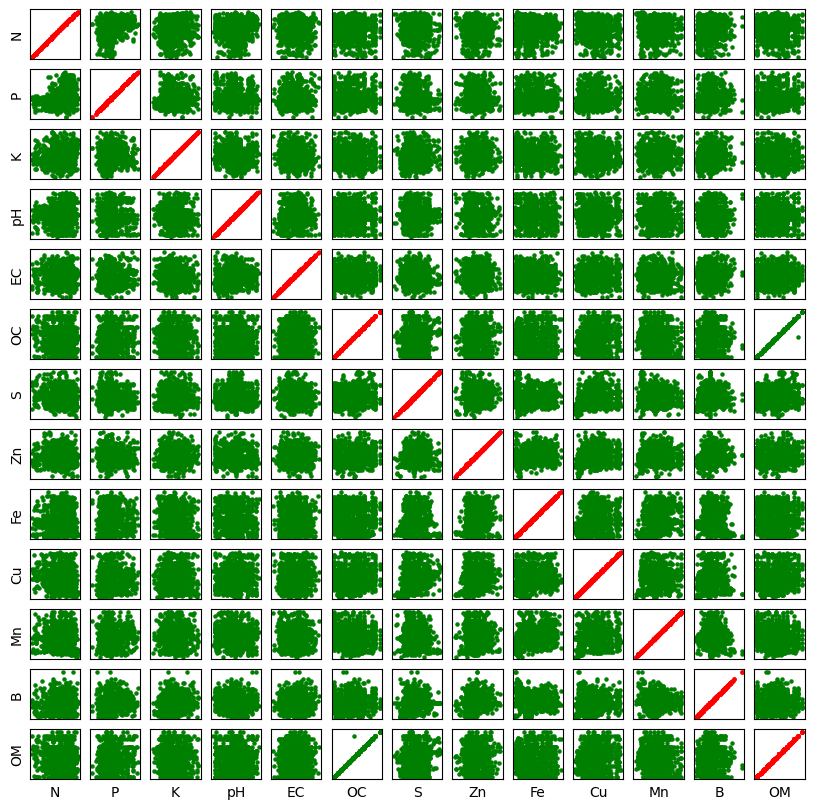

In [262]:

size = len(df[0])-1
fig, axes = plt.subplots(size, size, figsize=(10, 10))
for i in range(size):
    for j in range(size):
        ax = axes[j][i]
        if i==j:
            ax.scatter(data[df[0][i]],data[df[0][j]],s=5,c="red")
        else:
            ax.scatter(data[df[0][i]],data[df[0][j]],s=5,c="green")
        ax.set_xticks([])  # Remove x-axis tick labels
        ax.set_yticks([])
        if i==0:
            ax.set_ylabel(df[0][j])
        if j == size-1:
            ax.set_xlabel(df[0][i])
plt.savefig('correlation_figure.png', dpi=300)
plt.show()

## 1.2. Données temporelles

### 1.2.1. Prétraitement :

In [263]:
df2 = load_data_par_row("Dataset2.csv",columns = ["zcta","time_period","population","Start date","end date","case count","test count","positive tests","case rate","test rate","positivity rate"],
                       col_type = [int,int,int,str,str,int,int,int,float,float,float])

In [264]:
df2[:2]

[['zcta',
  'time_period',
  'population',
  'Start date',
  'end date',
  'case count',
  'test count',
  'positive tests',
  'case rate',
  'test rate',
  'positivity rate'],
 [95129, 32, 39741, '10/11/2020', '10/31/2020', 22, 2543, 23, 2.6, 304.7, 0.9]]

In [265]:
fixWithMean(df2,do_not = [3,4] )

In [266]:
removeAberr(df2,do_not = [3,4])

In [267]:
fixWithMean(df2,do_not = [3,4] )

In [268]:
def fixDate(df,do = [3,4] ):
    for col in do: 
        for row in range(1,len(df)):
            if "-" in df[row][col]:
                
                date_object = datetime.strptime(df[row][col], '%d-%b')
                current_year = datetime.now().year
                df[row][col] = datetime(current_year, date_object.month, date_object.day)
            else:
                df[row][col] = datetime.strptime(df[row][col], '%m/%d/%Y')



In [269]:
fixDate(df2)

In [270]:
df2[1]

[95129,
 32,
 39741,
 datetime.datetime(2020, 10, 11, 0, 0),
 datetime.datetime(2020, 10, 31, 0, 0),
 22,
 2543,
 23,
 2.6,
 304.7,
 0.9]

### 1.2.2. Visualisation :

#### La distribution du nombre total des cas confirmés et tests positifs par zones (Indication : Tree Map/Bar chart)

In [271]:
def testpos_par_zone(df):
    # row[0] zone id 
    # row[7] positive tests 
    count = dict()
    for row in df[1:]:
        if count.get(row[0]):
            count[row[0]] +=int(row[7] )
        else :
            count[row[0]] =int(row[7])
    return count

In [272]:
count_z_pos = testpos_par_zone(df2)

In [273]:
count_z_pos

{95129: 8203,
 95128: 8371,
 95127: 12978,
 95035: 9845,
 94087: 8532,
 94086: 8578,
 94085: 7422}

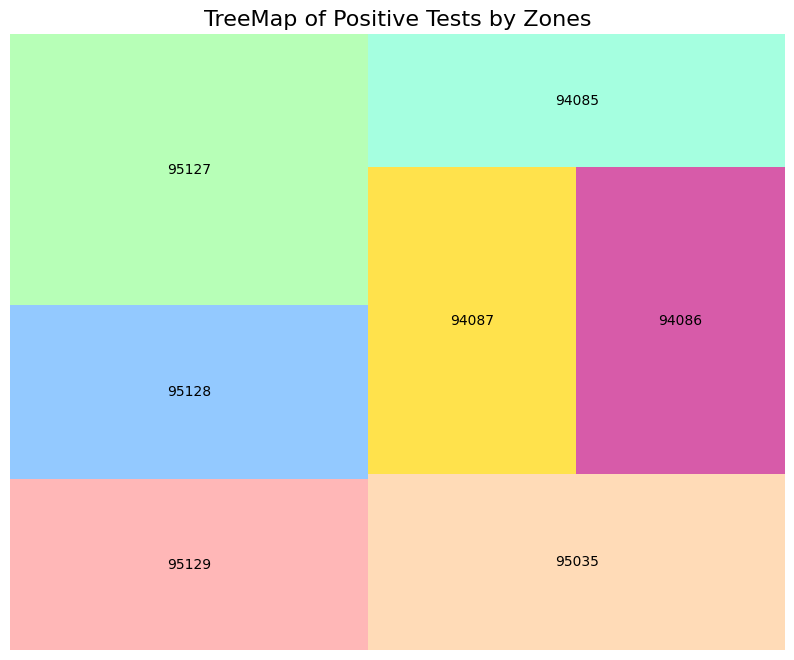

In [274]:
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#C71585', '#7FFFD4']
plt.figure(figsize=(10, 8))
squarify.plot(sizes=count_z_pos.values(), label=count_z_pos.keys(), color=colors, alpha=0.7, text_kwargs={'fontsize': 10})

plt.axis('off')
plt.title('TreeMap of Positive Tests by Zones', fontsize=16)
plt.show()

#### Comment les tests COVID-19, les tests positifs et le nombre de cas évolue au fil du temps (hebdomadaire, mensuel et annuel) pour une zone choisit ? (Indication : Line chart) 

In [275]:
def get_onezone(df,zone):
    out = []
    for row in df[1:]:
        if row[0]==zone:
            out.append(row)
    return out

In [276]:
zone95127 = get_onezone(df2,95127)

In [277]:
zone95127.sort(key=lambda x : x[3])

In [278]:
zone95127[:1]

[[95127,
  18,
  66256,
  datetime.datetime(2019, 12, 22, 0, 0),
  datetime.datetime(2020, 1, 11, 0, 0),
  0,
  4938.116923076923,
  380.1967741935484,
  0.0,
  0.1,
  0.0]]

In [279]:
transposed = list(map(list, zip(*zone95127)))

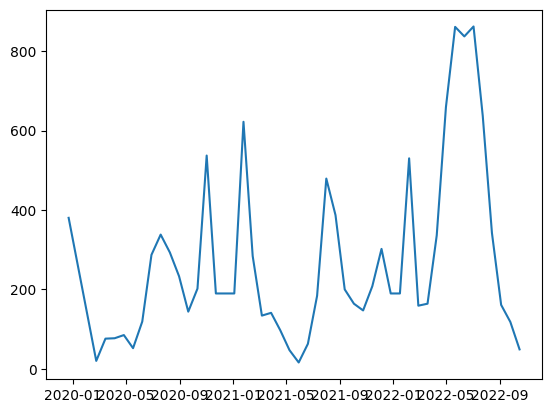

In [280]:
plt.plot(transposed[3],transposed[7])

In [281]:
def testpos_par_month(df):
    # row[0] zone id 
    # row[7] positive tests 
    count = dict()
    for row in df:
        yearmonth = datetime(row[3].year, row[3].month, 1)#f'{row[3].month}/{row[3].year}'
        if count.get(yearmonth):
            count[yearmonth] +=int(row[7] )
        else :
            count[yearmonth] =int(row[7])
    return count

In [282]:
count_month = testpos_par_month(zone95127)

In [283]:
months_counts_list = list(count_month.items())
months_counts_list.sort(key=lambda x : x[0])

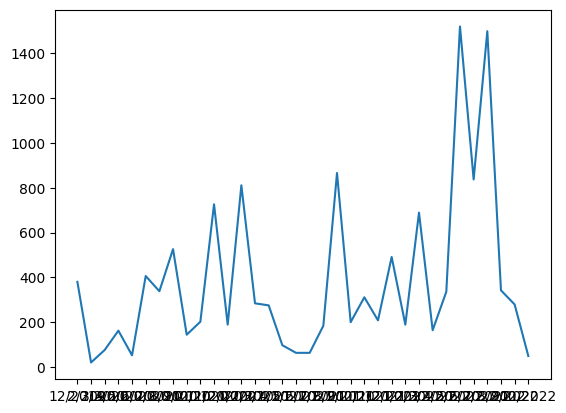

In [284]:
plt.plot([f'{i[0].month}/{i[0].year}' for i in months_counts_list],[i[1] for i in months_counts_list])

In [285]:
def testpos_par_year(df):
    # row[0] zone id 
    # row[7] positive tests 
    count = dict()
    for row in df:
        year = row[3].year#f'{row[3].month}/{row[3].year}'
        if count.get(year):
            count[year] +=int(row[7] )
        else :
            count[year] =int(row[7])
    return count

In [286]:
count_year = testpos_par_year(zone95127)

In [287]:
years_counts_list = list(count_year.items())
years_counts_list.sort(key=lambda x : x[0])

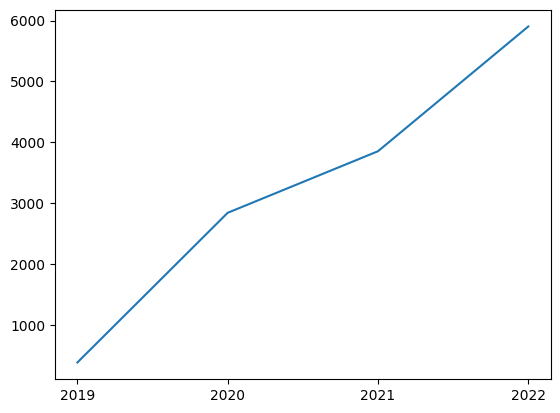

In [288]:
plt.plot([f'{i[0]}' for i in years_counts_list],[i[1] for i in years_counts_list])

In [289]:
years_counts_list

[(2019, 380), (2020, 2841), (2021, 3853), (2022, 5904)]

#### Comment les cas covid positifs sont distribués par zone et par année ? (Indication : Stacked Bar chart) 

In [290]:
positif_par_zone_par_annee = dict()
for zone in count_z_pos.keys():
    zoneDF = get_onezone(df2,zone)
    count_year = testpos_par_year(zoneDF)
    years_counts_list = list(count_year.items())
    years_counts_list.sort(key=lambda x : x[0]) # [(2019, 380), (2020, 2841), (2021, 3853), (2022, 5904)]
    positif_par_zone_par_annee[zone]=years_counts_list

    

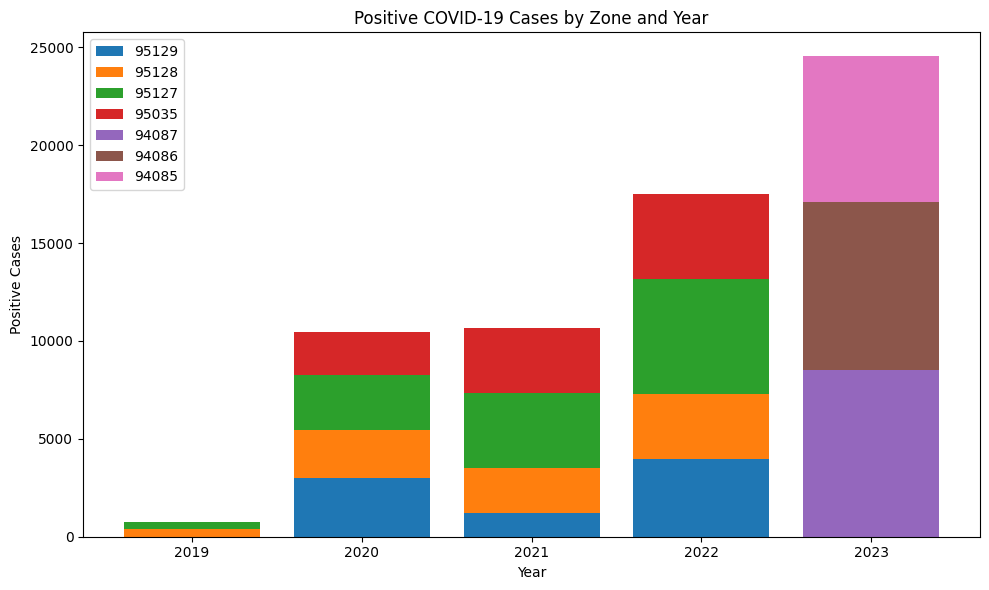

In [291]:
years = sorted({year for zone_data in positif_par_zone_par_annee.values() for year, _ in zone_data})

zone_data_dict = {}
for zone, data in positif_par_zone_par_annee.items():
    zone_data_dict[zone] = {year: count for year, count in data}

    for year in years:
        if year not in zone_data_dict[zone]:
            zone_data_dict[zone][year] = 0

zone_labels = list(positif_par_zone_par_annee.keys())

plt.figure(figsize=(10, 6))

prev_values = [0] * len(years)

for i, zone in enumerate(positif_par_zone_par_annee):
    year_values = [zone_data_dict[zone][year] for year in years]

    plt.bar(
        years,
        year_values,
        label=zone_labels[i],
        bottom=prev_values,
    )

    prev_values = [prev + curr for prev, curr in zip(prev_values, year_values)]

plt.xlabel('Year')
plt.ylabel('Positive Cases')
plt.title('Positive COVID-19 Cases by Zone and Year')
plt.xticks(years)
plt.legend()
plt.tight_layout()
plt.show()

#### Comment peut-on efficacement graphiquement représenter le rapport entre la population et le nombre de tests effectués ?

In [292]:
def test_par_zone(df):
    # row[0] zone id 
    # row[7] positive tests 
    count = dict()
    for row in df[1:]:
        if count.get(row[0]):
            count[row[0]][0] +=int(row[6] )
        else :
            count[row[0]] =[int(row[6]),row[2]]
    return count

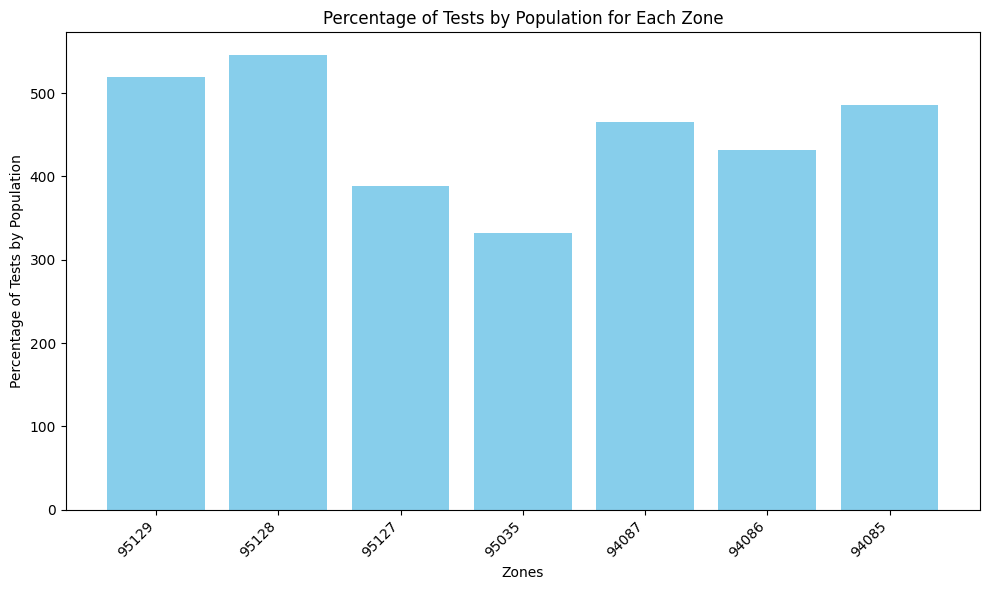

In [293]:
test_pop = test_par_zone(df2)
zones = list(map(str,test_pop.keys()))
test_percentages = [(tests / pop) * 100 for tests, pop in test_pop.values()]

plt.figure(figsize=(10, 6))
plt.bar(zones, test_percentages, color='skyblue')
plt.xlabel('Zones')
plt.ylabel('Percentage of Tests by Population')
plt.title('Percentage of Tests by Population for Each Zone')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability if needed
plt.tight_layout()
plt.show()

#### Quelles sont les 5 zones les plus fortement impactées par le coronavirus ?

In [294]:
def pos_par_pop_par_zone(df):
    # row[0] zone id 
    # row[7] positive tests 
    count = dict()
    for row in df[1:]:
        if count.get(row[0]):
            count[row[0]][0] +=int(row[7] )
        else :
            count[row[0]] =[int(row[7]),row[2]]
    for k,v in count.items():
        pos ,pop = v
        count[k] = (pos / pop) * 100
    return count

In [295]:
count = list(pos_par_pop_par_zone(df2).items())
count.sort(key=lambda x:x[1],reverse=True)

In [296]:
print('les 5 zones les plus fortement impactées par le coronavirus:')
for i in range(5):
    print(f'{i+1} - ZONE {count[i][0]} ({round(count[i][1],2)} % de la polulation teste possitif)')

les 5 zones les plus fortement impactées par le coronavirus:
1 - ZONE 94085 (31.96 % de la polulation teste possitif)
2 - ZONE 95128 (22.64 % de la polulation teste possitif)
3 - ZONE 95129 (20.64 % de la polulation teste possitif)
4 - ZONE 95127 (19.59 % de la polulation teste possitif)
5 - ZONE 94086 (16.99 % de la polulation teste possitif)


#### Quel est le rapport entre les cas confirmés, les tests effectués et les tests positifs au fil du temps pour chaque zone ? (La période doit être choisie)

# 2.  Extraction de motifs fréquents, règles d’associations et corrélations

#### fix the dataset

In [3]:
df3  = pd.read_csv("Dataset3.csv")

In [7]:
df3['Fertilizer'].unique()

array(['DAP', 'Good NPK', 'MOP', 'Urea'], dtype=object)

In [9]:
df3['Temperature'] = df3['Temperature'].str.replace(',', '.').astype(float)
df3['Humidity'] = df3['Humidity'].str.replace(',', '.').astype(float)
df3['Rainfall'] = df3['Rainfall'].str.replace(',', '.').astype(float)

In [10]:
df3.to_csv("Dataset3_fixed.csv",index=False)

In [11]:
df3 = load_data_par_row("Dataset3_fixed.csv",columns = ["Temperature","Humidity","Rainfall","Soil","Crop","Fertilizer"],
                       col_type = [float,float,float,str,str,str],rm_end=True)

In [12]:
df3[:5]

[['Temperature', 'Humidity', 'Rainfall', 'Soil', 'Crop', 'Fertilizer'],
 [24.87, 82.84, 295.61, 'Clayey', 'rice', 'DAP'],
 [28.69, 96.65, 178.96, 'laterite', 'Coconut', 'Good NPK'],
 [20.27, 81.64, 270.44, 'silty clay', 'rice', 'MOP'],
 [25.07, 95.02, 192.9, 'sandy', 'Coconut', 'Urea']]

### 2 - 1 - Choisissez un des attributs représentant le climat : ‘Temperature’ ou bien ‘Rainfall’ ou bien ‘Humidity’, puis discrétiser ces données continues de cet attribut, en utilisant ces 2 méthodes 

In [13]:
def compute_k(l):
    k = round(1+10/3*math.log10(len(l)))
    return k

#### En classes d’effectifs égaux (equal-frequency)

In [14]:
Temperature = [i[0] for i in df3[1:]]
compute_k(Temperature)

9

In [15]:
def div_to_k_frequency(l,k=None,classes=None,replace_with_moy=False):
    if k==None:
        k=compute_k(l)
    if classes == None or len(classes)!=k:
        classes=["class_"+str(i+1) for i in range(k)]
    if replace_with_moy:
        classes_dict = {i:{"sum":0,"cpt":0,"moy":0}for i in classes}
    mn = min(l)
    mx = max(l)
    domain = mx-mn
    i = 0
    out = []
    while i<len(l):
        class_n = int((l[i]-mn)*k/domain)
        class_n =class_n if class_n< len(classes)else class_n - 1
        out.append(classes[class_n])
        if replace_with_moy:
            classes_dict[classes[class_n]]["sum"]+=l[i]
            classes_dict[classes[class_n]]["cpt"]+=1
        i+=1
    if replace_with_moy:
        for class_name in classes:
            classes_dict[class_name]["moy"] = round(classes_dict[class_name]["sum"]/classes_dict[class_name]["cpt"],2)
        i = 0
        while i<len(l):
            l[i]=classes_dict[out[i]]["moy"]
            i+=1
    return out

In [16]:
div_to_k_frequency(Temperature)[:5]

['class_5', 'class_8', 'class_1', 'class_5', 'class_5']

#### En classes d’amplitudes égales (equal-width)

In [17]:
def div_to_k_width(df, k=None, classes=None,sur= 0):
    if k is None:
        Temperature = [i[0] for i in df[1:]]
        k = compute_k(Temperature)
    if classes is None or len(classes) != k:
        classes = ["class_" + str(i + 1) for i in range(k)]
    
    # Sort the input list
    sorted_l = sorted(df[1:],key = lambda x : x[sur])
    n = len(sorted_l)
    class_size = n // k
    remainder = n % k
    i = 0
    out = [df[0]]
    

    for class_n in range(k):
        class_start = i
        class_end = i + class_size + (1 if class_n < remainder else 0)
        class_values = sorted_l[class_start:class_end]

        for val in class_values:
            val[sur] = classes[class_n]
            out.append(val)
        i = class_end

    return out

In [18]:
div_to_k_width(df3,classes=["Freezing","Cold","Chilly","Cool","Warm","Hot","Scorching","Sweltering","Searing"],sur=0)[:10]

[['Temperature', 'Humidity', 'Rainfall', 'Soil', 'Crop', 'Fertilizer'],
 ['Freezing', 80.35, 208.58, 'silty clay', 'rice', 'Urea'],
 ['Freezing', 80.35, 208.58, 'silty clay', 'rice', 'MOP'],
 ['Freezing', 83.29, 263.64, 'Clayey', 'rice', 'Urea'],
 ['Freezing', 83.29, 263.64, 'Clayey', 'rice', 'MOP'],
 ['Freezing', 81.6, 262.72, 'Clayey', 'rice', 'MOP'],
 ['Freezing', 81.64, 270.44, 'silty clay', 'rice', 'MOP'],
 ['Freezing', 82.12, 191.95, 'sandy', 'Coconut', 'Urea'],
 ['Freezing', 82.89, 241.97, 'Clayey', 'rice', 'MOP'],
 ['Freezing', 82.12, 191.95, 'sandy', 'Coconut', 'DAP']]

In [19]:
div_to_k_width(df3,classes=["humidity_" + str(i + 1) for i in range(9)],sur=1)[:10]

[['Temperature', 'Humidity', 'Rainfall', 'Soil', 'Crop', 'Fertilizer'],
 ['Hot', 'humidity_1', 218.92, 'Clayey', 'rice', 'Urea'],
 ['Hot', 'humidity_1', 218.92, 'Clayey', 'rice', 'DAP'],
 ['Warm', 'humidity_1', 200.83, 'silty clay', 'rice', 'MOP'],
 ['Hot', 'humidity_1', 242.86, 'Clayey', 'rice', 'DAP'],
 ['Cold', 'humidity_1', 224.56, 'silty clay', 'rice', 'Urea'],
 ['Freezing', 'humidity_1', 277.96, 'Clayey', 'rice', 'DAP'],
 ['Freezing', 'humidity_1', 277.96, 'Clayey', 'rice', 'MOP'],
 ['Chilly', 'humidity_1', 263.11, 'Clayey', 'rice', 'Urea'],
 ['Chilly', 'humidity_1', 263.11, 'Clayey', 'rice', 'DAP']]

In [20]:
div_to_k_width(df3,classes=["Rainfall_" + str(i + 1) for i in range(9)],sur=2)

[['Temperature', 'Humidity', 'Rainfall', 'Soil', 'Crop', 'Fertilizer'],
 ['Sweltering', 'humidity_8', 'Rainfall_1', 'laterite', 'Coconut', 'Urea'],
 ['Searing', 'humidity_6', 'Rainfall_1', 'coastal', 'Coconut', 'Good NPK'],
 ['Warm', 'humidity_7', 'Rainfall_1', 'alluvial', 'Coconut', 'Urea'],
 ['Warm', 'humidity_7', 'Rainfall_1', 'alluvial', 'Coconut', 'DAP'],
 ['Hot', 'humidity_8', 'Rainfall_1', 'coastal', 'Coconut', 'MOP'],
 ['Searing', 'humidity_6', 'Rainfall_1', 'alluvial', 'Coconut', 'Urea'],
 ['Searing', 'humidity_6', 'Rainfall_1', 'alluvial', 'Coconut', 'DAP'],
 ['Warm', 'humidity_6', 'Rainfall_1', 'sandy', 'Coconut', 'Urea'],
 ['Warm', 'humidity_6', 'Rainfall_1', 'sandy', 'Coconut', 'DAP'],
 ['Cool', 'humidity_6', 'Rainfall_1', 'alluvial', 'Coconut', 'Urea'],
 ['Sweltering', 'humidity_8', 'Rainfall_1', 'sandy', 'Coconut', 'DAP'],
 ['Cool', 'humidity_7', 'Rainfall_1', 'alluvial', 'Coconut', 'MOP'],
 ['Cool', 'humidity_7', 'Rainfall_1', 'coastal', 'Coconut', 'MOP'],
 ['Hot', 'hum

### 2 - 2 - Extraction des motifs fréquents puis les règles d’association en utilisant l’algorithme Apriori. Effectuer des expérimentations en variant les valeurs de Min_Supp et Min_Conf

In [21]:
def C(data,k=2,cmin = 2):
    c1 = dict()
    for l in data.values():
        for i in l:
            if c1.get(i):
                c1[i]+=1
            else:
                c1[i] = 1
    print("c1 :",c1)
    print("nombre des items :" , len(c1))
    l1 = l_func(c1,cmin)
    return cn_func(l1,l1,data,k-1,2,[l1],cmin)
def l_func(c,cmin=2):
    l1 = dict()
    for i,j in c.items():
        if j>=cmin:
            l1[i]=j
    return l1
def get_new_item_list(l1,l2,n):
    if n>2:
        new_list= []
        for i in l1 :
            for j in l2:
                if j not in i.split(","):
                    new_list.append(",".join([i,j]))
        return get_new_item_list(new_list,l2,n-1)
    else:
        new_list= []
        for i in l1 :
            for j in l2:
                if j not in i.split(","):
                    new_list.append(",".join([i,j]))
        return new_list
def cn_func(l,l1,data,k,n,l_list,cmin):
    print(k)
    if k > 0:
        cn = dict()
        lv = list(l1.keys())
        list_of_newkeys= get_new_item_list(lv,lv,n)

        for i in  list_of_newkeys:
            li = i.split(",")
            
            for l in data.values():
                f = True
                for e in li: 
                    if not(e in l):
                        f = False
                if f:
                    if cn.get(i):
                        cn[i]+=1
                    else:
                        cn[i] = 1
        ln =l_func(cn,cmin)
        l_list.append(ln)
        return cn_func(ln,l1,data,k-1,n+1,l_list,cmin)
    else :
        return l, l_list

In [22]:
lk,lks=C({i:j for i,j in enumerate(df3[1:])},k=6,cmin = int(len(df3)*0.15))

c1 : {'Chilly': 33, 'humidity_3': 33, 'Rainfall_9': 32, 'Clayey': 54, 'rice': 143, 'DAP': 86, 'Sweltering': 32, 'humidity_8': 32, 'Rainfall_3': 33, 'laterite': 28, 'Coconut': 152, 'Good NPK': 33, 'Freezing': 33, 'humidity_2': 33, 'silty clay': 65, 'MOP': 75, 'Cool': 33, 'humidity_7': 33, 'Rainfall_4': 33, 'sandy': 48, 'Urea': 101, 'coastal': 50, 'humidity_5': 33, 'Rainfall_7': 33, 'clay loam': 24, 'Warm': 33, 'alluvial': 26, 'Hot': 33, 'humidity_1': 33, 'Rainfall_8': 32, 'Rainfall_2': 33, 'Cold': 33, 'Searing': 32, 'Rainfall_6': 33, 'humidity_9': 32, 'Scorching': 33, 'humidity_6': 33, 'Rainfall_5': 33, 'Rainfall_1': 33, 'humidity_4': 33}
nombre des items : 40
5
4


3
2
1
0


In [23]:
lks

[{'Clayey': 54,
  'rice': 143,
  'DAP': 86,
  'Coconut': 152,
  'silty clay': 65,
  'MOP': 75,
  'sandy': 48,
  'Urea': 101,
  'coastal': 50},
 {'Clayey,rice': 54,
  'rice,Clayey': 54,
  'rice,DAP': 47,
  'rice,silty clay': 65,
  'rice,Urea': 48,
  'DAP,rice': 47,
  'Coconut,sandy': 48,
  'Coconut,Urea': 53,
  'Coconut,coastal': 50,
  'silty clay,rice': 65,
  'sandy,Coconut': 48,
  'Urea,rice': 48,
  'Urea,Coconut': 53,
  'coastal,Coconut': 50},
 {},
 {},
 {},
 {}]

In [24]:
def get_cmbinations(s):
    out = []
    l = s.split(",")
    for pos in range(len(l)):
        for i in range(pos+1,len(l)):
            a = l[pos:i]
            try:
                b1=l[:pos]
            except:
                b1=[]
            try:
                b2=l[i:]
            except:
                b2=[]
            b = b1+b2
            out.append([a,b])
    return out

def RA(lks):
    all_RA = []
    for lk in lks:
        for s in lk.keys():
            all_RA.extend(get_cmbinations(s))
    return all_RA

In [25]:
tout_les_RA = RA(lks)

In [26]:
def check_RA(RA,lks):
    lk = lks[len(RA[0])+len(RA[1])-1]
    #check A
    cpt_a = 0
    cpt_b = 0
    for i in lk.keys():
        trans = i.split(",")
        flag = True
        for item in RA[0]:
            if not item in trans:
                flag = False
        if flag : 
            cpt_a += 1
            for item in RA[1]:
                if not item in trans:
                    flag = False
            if flag:# still true
                cpt_b += 1
    return cpt_b/cpt_a

In [27]:
check_RA(tout_les_RA[0],lks)

1.0

In [28]:
confRA = []
for i in tout_les_RA:
    conf = round(check_RA(i,lks)*100,2)
    conf = round(check_RA(i,lks)*100,2)
    confRA.append([i,conf])
    print(i[0] ,"-->",i[1] , "| confiance = ",conf,"%")

['Clayey'] --> ['rice'] | confiance =  100.0 %
['rice'] --> ['Clayey'] | confiance =  25.0 %
['rice'] --> ['DAP'] | confiance =  25.0 %
['rice'] --> ['silty clay'] | confiance =  25.0 %
['rice'] --> ['Urea'] | confiance =  25.0 %
['DAP'] --> ['rice'] | confiance =  100.0 %
['Coconut'] --> ['sandy'] | confiance =  33.33 %
['Coconut'] --> ['Urea'] | confiance =  33.33 %
['Coconut'] --> ['coastal'] | confiance =  33.33 %
['silty clay'] --> ['rice'] | confiance =  100.0 %
['sandy'] --> ['Coconut'] | confiance =  100.0 %
['Urea'] --> ['rice'] | confiance =  50.0 %
['Urea'] --> ['Coconut'] | confiance =  50.0 %
['coastal'] --> ['Coconut'] | confiance =  100.0 %


In [29]:
confRA.sort(key=lambda x:x[1],reverse=True)

In [30]:
len([i for i in confRA if i[1]==100])

5

avec supp min de 20% :<br>

on a trove deux regle avec confiance de 100%<br>

- ['rice'] --> ['silty clay'] | confiance =  100.0 %<br>

- ['silty clay'] --> ['rice'] | confiance =  100.0 %<br>

avec supp min de 15% :

- ['Clayey'] --> ['rice'] | confiance =  100.0 %

- ['DAP'] --> ['rice'] | confiance =  100.0 %

- ['silty clay'] --> ['rice'] | confiance =  100.0 %

- ['sandy'] --> ['Coconut'] | confiance =  100.0 %

- ['coastal'] --> ['Coconut'] | confiance =  100.0 %